# 3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

# You may need some sklearn specific imports, or other standard toolboxes

C:\Users\joshw\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load dataset

In [57]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

In [58]:
trainingset.shape

(28709, 2311)

## Split data

In [59]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [60]:
x_training.shape

(28709, 48, 48)

In [61]:
y_training.shape

(28709, 7)

In [ ]:
def view_image(x,i):
    plt.imshow(x[i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axes for cleaner display
    plt.show()

k = 233
print(get_emotion(y_training[k]))
view_image(x_training,k)

In [ ]:
def Stratified_sampling(data):
    

In [ ]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

In [ ]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases


In [120]:
import numpy as np

class EmotionDataProcessor:
    def __init__(self, x_training, y_training, x_testing, y_testing):
        self.x_training = x_training
        self.y_training = y_training
        self.x_testing = x_testing
        self.y_testing = y_testing

        # Initialize category data
        self.y_train_categories = self._one_hot_to_categories(y_training)
        self.y_test_categories = self._one_hot_to_categories(y_testing)

    def _one_hot_to_categories(self, y_data):
        return np.array([np.argmax(one_hot) for one_hot in y_data])

    def get_emotion_indices(self, emotion_indices=[3, 4]):
        train_indices = np.where(np.isin(self.y_train_categories, emotion_indices))
        test_indices = np.where(np.isin(self.y_test_categories, emotion_indices))
        return train_indices, test_indices

    def get_emotion_data(self, emotion_indices=[3, 4]):
        train_indices, test_indices = self.get_emotion_indices(emotion_indices)

        # Filter data using the indices
        x_train_filtered = self.x_training[train_indices]
        x_test_filtered = self.x_testing[test_indices]

        y_train_filtered_one_hot = self.y_training[train_indices]
        y_train_filtered = self.y_train_categories[train_indices]

        y_test_filtered_one_hot = self.y_testing[test_indices]
        y_test_filtered = self.y_test_categories[test_indices]

        return (x_train_filtered, y_train_filtered_one_hot, y_train_filtered,
                x_test_filtered, y_test_filtered_one_hot, y_test_filtered)

    def get_summary(self):
        train_indices, test_indices = self.get_emotion_indices()
        print(f"Training Data Length: {len(self.y_train_categories)}")
        print(f"Testing Data Length: {len(self.y_test_categories)}")
        print(f"Filtered Training Length: {len(train_indices[0])}")
        print(f"Filtered Testing Length: {len(test_indices[0])}")

        print("Unique Train Categories:", np.unique(self.y_train_categories[train_indices]))
        print("Unique Test Categories:", np.unique(self.y_test_categories[test_indices]))


# Usage Example
# Assuming x_training, y_training, x_testing, y_testing are defined and loaded

processor = EmotionDataProcessor(x_training, y_training, x_testing, y_testing)
processor.get_summary()

x_train_happy_or_sad, y_train_happy_or_sad_one_hot, y_train_happy_or_sad, \
x_test_happy_or_sad, y_test_happy_or_sad_one_hot, y_test_happy_or_sad = processor.get_emotion_data([3, 4])


Training Data Length: 28709
Testing Data Length: 3589
Filtered Training Length: 12045
Filtered Testing Length: 1548
Unique Train Categories: [3 4]
Unique Test Categories: [3 4]


(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


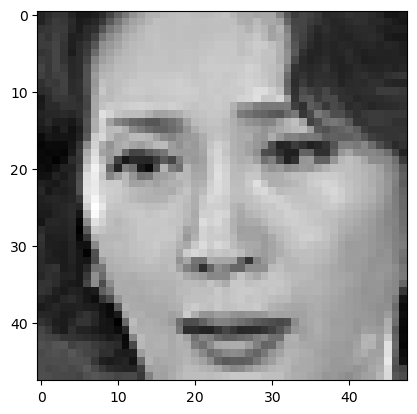

facial emotion: sad


In [54]:

sampleindex = np.random.randint(0,1000)
sample = x_test_happy_or_sad[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_test_happy_or_sad_one_hot[sampleindex, :]))

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

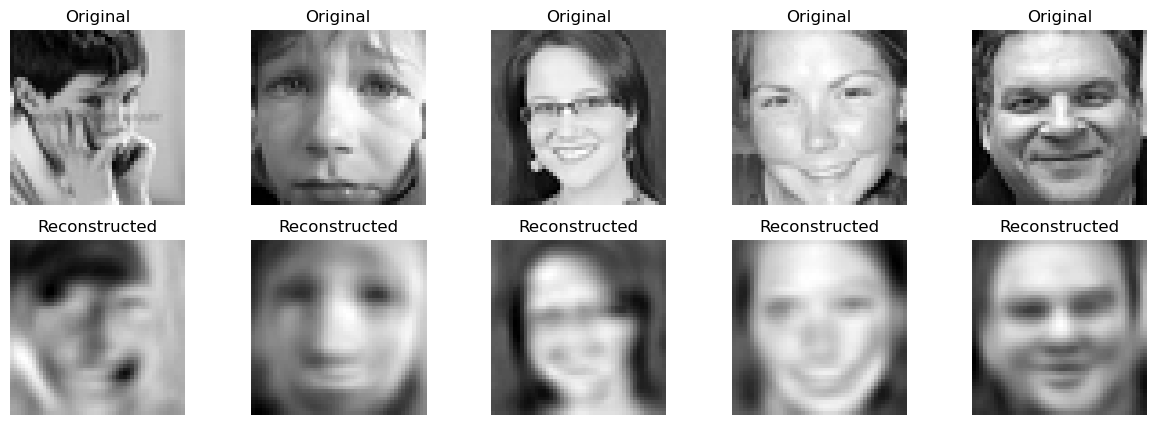

In [122]:

class PCAFaceReconstructor:
    def __init__(self, x_train_data, n_components=100, img_shape=(48, 48)):
        """Initialize with training data, PCA components, and image shape."""
        self.x_train_data = x_train_data
        self.n_components = n_components
        self.img_shape = img_shape

        # Flatten the input data
        self.number_of_samples = x_train_data.shape[0]
        self.x_train_flattened = self._flatten_data()

        # Initialize PCA model
        self.pca = PCA(n_components=n_components)

    def _flatten_data(self):
        """Flatten the input data to 2D shape."""
        return self.x_train_data.reshape(self.number_of_samples, -1)

    def apply_pca(self):
        """Apply PCA on the flattened data and return the reconstructed images."""
        X_pca = self.pca.fit_transform(self.x_train_flattened)
        X_reconstructed = self.pca.inverse_transform(X_pca)
        return X_reconstructed

    def plot_faces(self, original, reconstructed, n_faces=5):
        """Plot original vs reconstructed faces side by side."""
        plt.figure(figsize=(15, 5))
        for i in range(n_faces):
            # Original images
            plt.subplot(2, n_faces, i + 1)
            plt.imshow(original[i].reshape(self.img_shape), cmap='gray')
            plt.title("Original")
            plt.axis('off')

            # Reconstructed images
            plt.subplot(2, n_faces, n_faces + i + 1)
            plt.imshow(reconstructed[i].reshape(self.img_shape), cmap='gray')
            plt.title("Reconstructed")
            plt.axis('off')

        plt.show()

    def run_pca_and_plot(self, n_faces=5):
        """Run PCA and plot the original vs reconstructed images."""
        reconstructed_data = self.apply_pca()
        self.plot_faces(self.x_train_data, reconstructed_data, n_faces)


pca_reconstructor = PCAFaceReconstructor(x_train_happy_or_sad, n_components=100, img_shape=(48, 48))
pca_reconstructor.run_pca_and_plot(n_faces=5)


In [149]:
x_test_happy_or_sad_flattened = x_test_happy_or_sad.reshape(x_test_happy_or_sad.shape[0],-1)

In [89]:
# LDA


# Apply LDA to reduce to 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(x_train_happy_or_sad_flattened, y_train_happy_or_sad)  # Shape: (n_samples, 1)

# Reconstruct the images from the LDA-reduced data (approximate inverse)
X_reconstructed_lda = lda.scalings_ @ X_lda.T  # Shape: (2304, n_samples)
X_reconstructed_lda = X_reconstructed_lda.T  # Transpose to (n_samples, 2304)

X_reconstructed_lda.shape

(12045, 2304)

In [138]:
# LDA 



class LDAImageReducer:
    def __init__(self, n_components=1):

        self.lda = LinearDiscriminantAnalysis(n_components=n_components)

    def fit_transform(self, X_train, y_train):
     
        self.X_train = X_train
        self.y_train = y_train
        self.X_lda = self.lda.fit_transform(X_train, y_train)  # Reduced to n_components
        return self.X_lda

    def reconstruct(self):

        # Approximate inverse using scalings
        X_reconstructed = self.lda.scalings_ @ self.X_lda.T  # Shape: (features, samples)
        return X_reconstructed.T  # Transpose to (samples, features)


lda_reducer = LDAImageReducer(n_components=1)
X_lda = lda_reducer.fit_transform(x_train_happy_or_sad_flattened, y_train_happy_or_sad)
X_reconstructed_lda = lda_reducer.reconstruct()

print(f"Shape of LDA-reduced data: {X_lda.shape}")
print(f"Shape of reconstructed data: {X_reconstructed_lda.shape}")


Shape of LDA-reduced data: (12045, 1)
Shape of reconstructed data: (12045, 2304)


In [143]:
X_reconstructed_lda.reshape(X_reconstructed_lda.shape[0],48,48).shape

(12045, 48, 48)

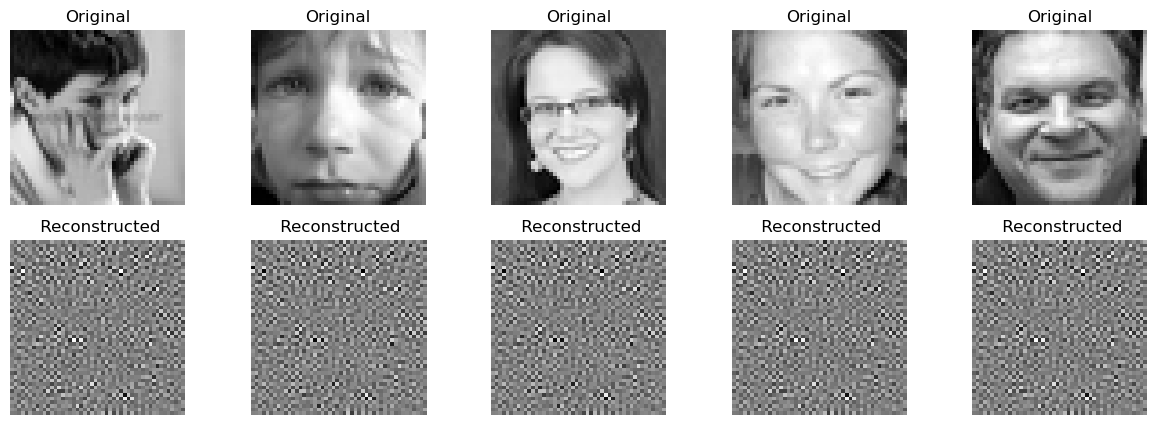

In [141]:
plot_faces(x_train_happy_or_sad, X_reconstructed_lda.reshape(X_reconstructed_lda.shape[0],48,48), n_faces=5)


[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [158]:
# YOUR CODE HERE

nb_model = GaussianNB()
nb_model.fit(x_train_happy_or_sad_flattened, y_train_happy_or_sad)


In [146]:
len(x_train_happy_or_sad_flattened),len(X_lda)

(12045, 12045)

In [159]:
class ModelEvaluator:
    def __init__(self, model, x_test, y_test):

        self.model = model
        self.x_test = x_test
        self.y_test = y_test

    def predict(self):
        """Generate predictions using the provided model."""
        return self.model.predict(self.x_test)

    def evaluate(self):
        """Evaluate the model's performance and print metrics."""
        y_pred = self.predict()

        # Calculate accuracy
        accuracy = accuracy_score(self.y_test, y_pred)
        print(f"Test Accuracy: {accuracy:.2f}")

        # Print confusion matrix
        print("Confusion Matrix:")
        cm = confusion_matrix(self.y_test, y_pred)
        
        self.plot_confusion_matrix(cm)
        
    def plot_confusion_matrix(self, cm):
        """Plot a confusion matrix with annotations and colors."""
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Happy','Sad'], yticklabels=['Happy','Sad'])

        # Labels and title
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix with Labels')

        # Add True/False annotations
#         for i in range(cm.shape[0]):
#             for j in range(cm.shape[1]):
#                 label = 'True' if i == j else 'False'
#                 plt.text(j + 0.5, i + 0.5, f'\n({label})', ha='center', va='center',
#                          color='black', fontsize=8)

        plt.show()


Test Accuracy: 0.59
Confusion Matrix:


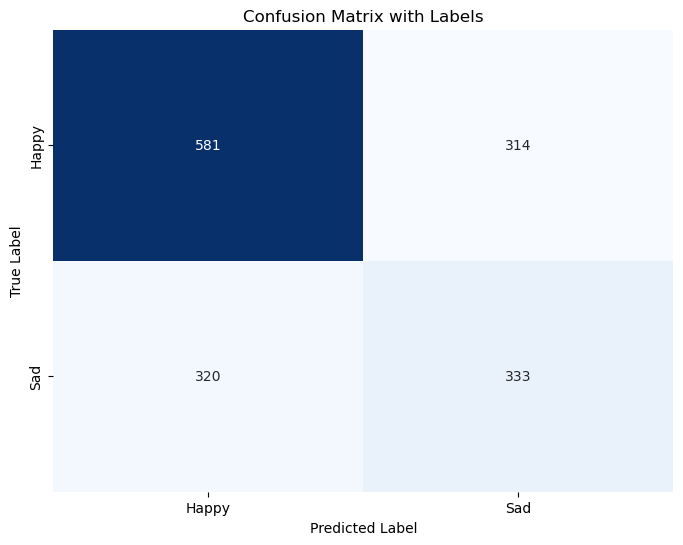

In [160]:
evaluator1 = ModelEvaluator(
    model=nb_model, 
    x_test=x_test_happy_or_sad_flattened, 
    y_test=y_test_happy_or_sad, 
)

evaluator1.evaluate()

[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [106]:
# YOUR CODE HERE

log_reg = LogisticRegression(max_iter=100)  # Increase max_iter if needed

# Train the model on the training data
log_reg.fit(x_train_happy_or_sad_flattened, y_train_happy_or_sad)

C:\Users\joshw\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
x_test_happy_or_sad_flattened = x_test_happy_or_sad.reshape(x_test_happy_or_sad.shape[0],-1)
y_pred = log_reg.predict(x_test_happy_or_sad_flattened)

# Calculate accuracy
accuracy = accuracy_score(y_test_happy_or_sad, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.70


Test Accuracy: 0.70
Confusion Matrix:


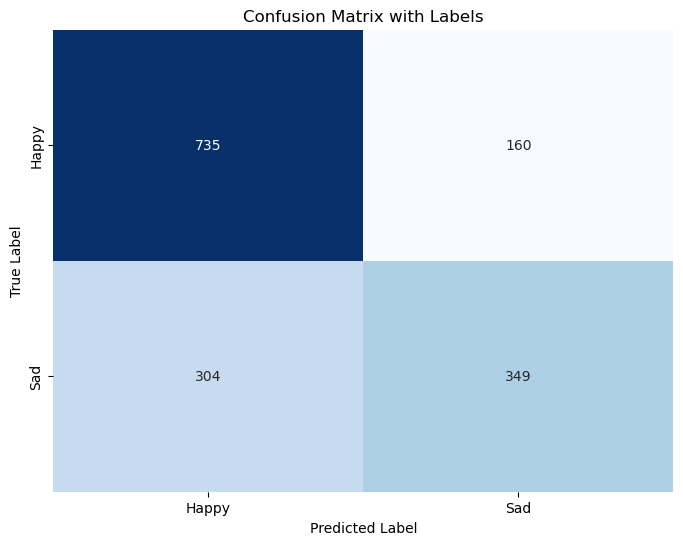

In [155]:
evaluator2 = ModelEvaluator(
    model=log_reg, 
    x_test=x_test_happy_or_sad_flattened, 
    y_test=y_test_happy_or_sad, 
)

evaluator2.evaluate()


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [117]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=2, verbose=2)
grid_search.fit(x_train_happy_or_sad_flattened, y_train_happy_or_sad)

print("Best Parameters:", grid_search.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 3.2min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 3.4min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.1min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.1min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 3.1min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 3.1min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 3.1min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 3.2min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 3.4min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 3.2min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 3.1min
[CV] END ...........................C=1, gamma=1,

In [118]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [119]:
# YOUR CODE HERE

svm_model = SVC(kernel='rbf', C=1.0, random_state=42, gamma = 0.01)

# Train the SVM model
svm_model.fit(x_train_happy_or_sad_flattened, y_train_happy_or_sad)

SVC(gamma=0.01, random_state=42)

Test Accuracy: 0.59
Confusion Matrix:


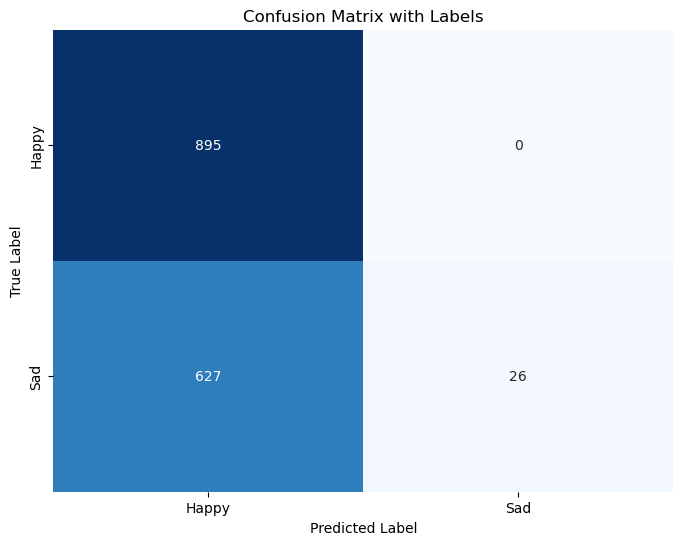

In [137]:

evaluator3 = ModelEvaluator(
    model=svm_model, 
    x_test=x_test_happy_or_sad_flattened, 
    y_test=y_test_happy_or_sad, 
)

evaluator3.evaluate()


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

YOUR ANSWER HERE

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [11]:
# YOUR CODE HERE


# To identify the degree of happiness or sadness ,we need intensity labelled dataset.
# Another way is to do use the probabalistic approach

# probabilistic approach 
# probabilistic approach is possible in all the 3 model. 
#but the results from svm is better beacuse of it comapretively high accuracy




# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [12]:
# YOUR CODE HERE

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [13]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [14]:
# YOUR CODE HERE

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [15]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [16]:
# YOUR CODE HERE

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [17]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [18]:
# YOUR CODE HERE

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [19]:
# YOUR CODE HERE